In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
bk1 = pd.read_csv("C:/Users/ABHILIPSA/Downloads/bank+marketing (1)/bank-additional/bank-additional/bank-additional.csv",delimiter=';')
bk1.rename(columns = {'y' : 'deposit'}, inplace = True)
bk1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
bk1.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [4]:
bk1.shape

(4119, 21)

In [5]:
bk1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [6]:
bk1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [7]:
bk1.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [8]:
bk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [9]:
bk1.duplicated().sum()

0

In [10]:
bk1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [11]:
cate_cols = bk1.select_dtypes(include = 'object').columns
print(cate_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')


In [12]:
num_cols = bk1.select_dtypes(exclude = 'object').columns
print(num_cols)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [13]:
bk1.describe

<bound method NDFrame.describe of       age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

     

In [14]:
bk1.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


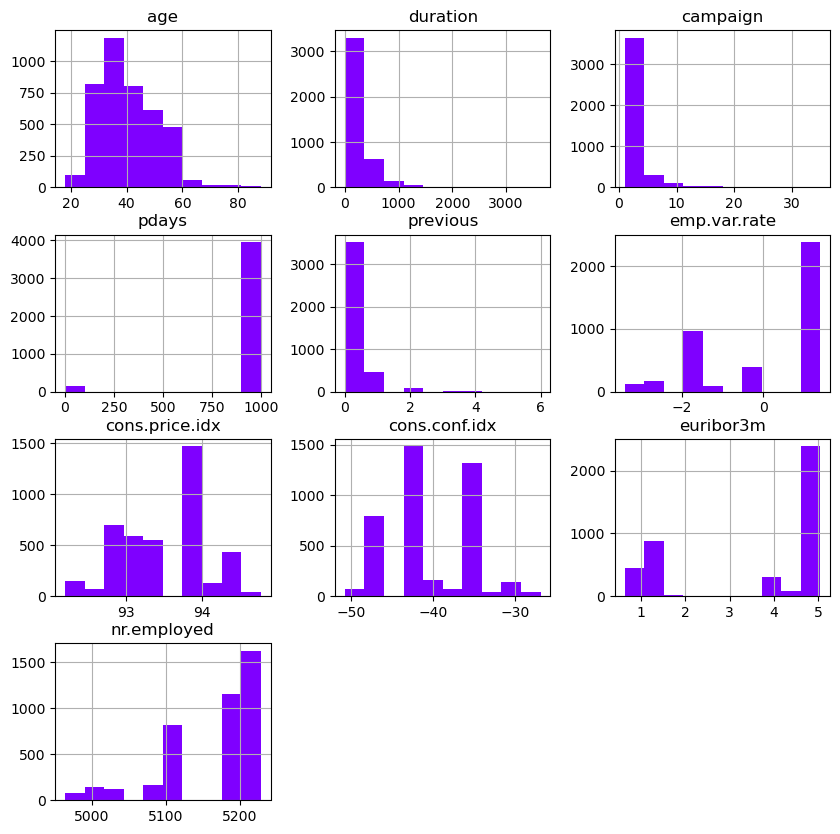

In [15]:
bk1.hist(figsize = (10,10),color = '#7F00FF')
plt.show()

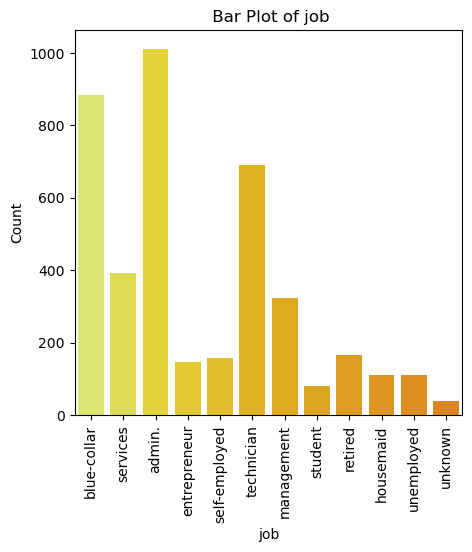

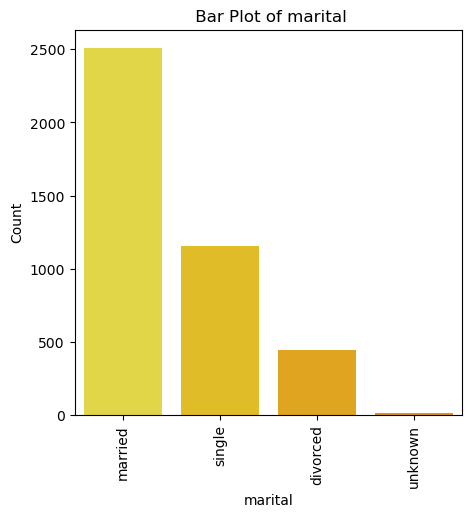

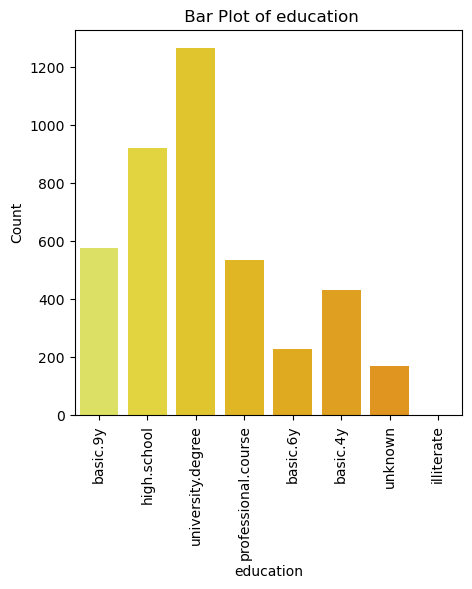

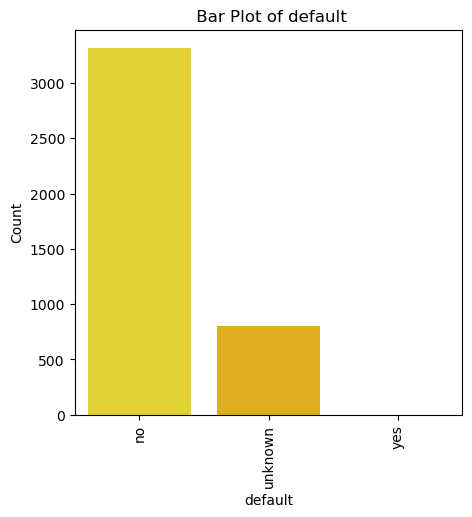

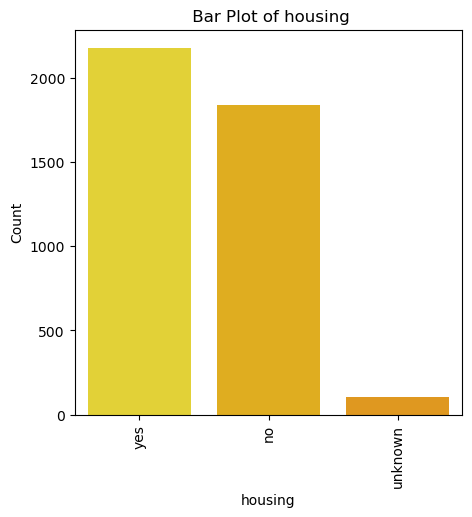

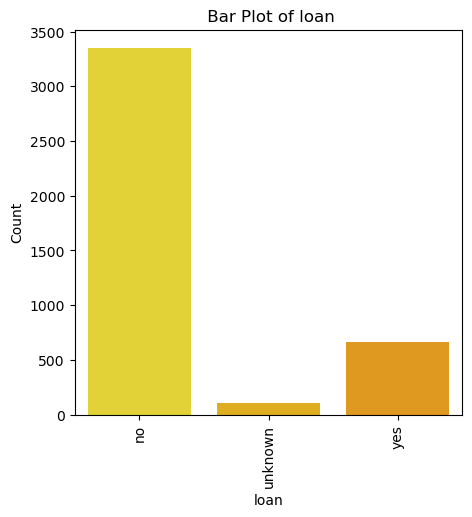

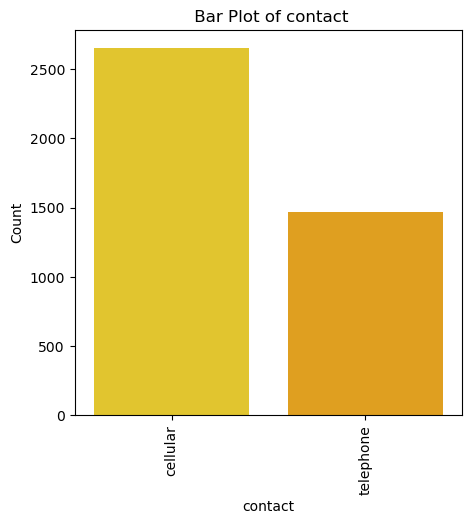

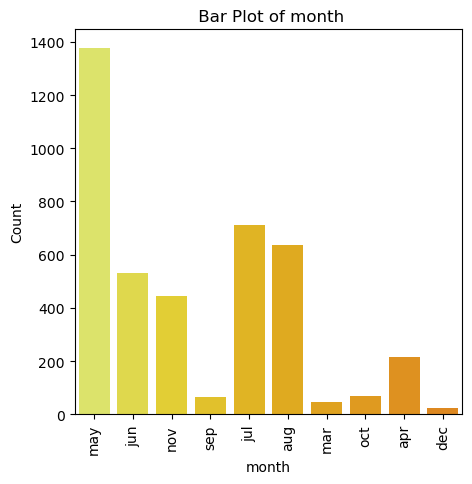

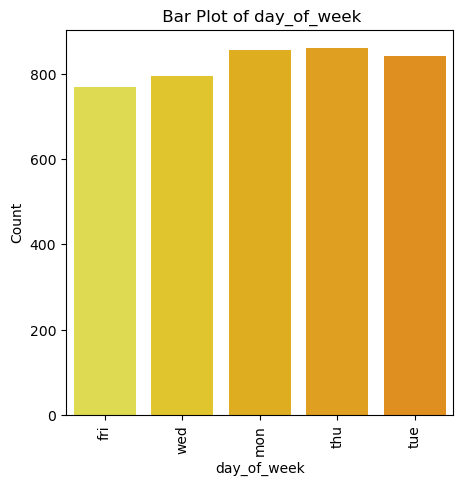

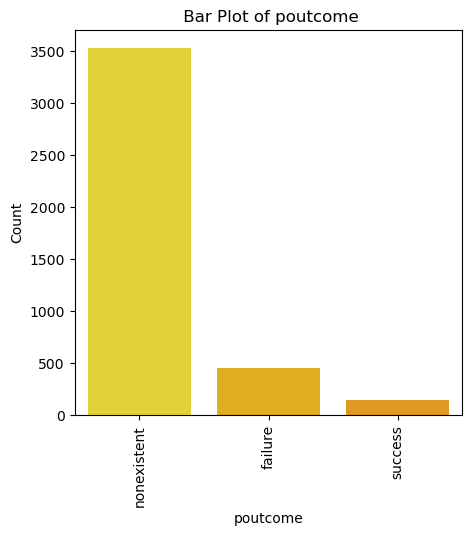

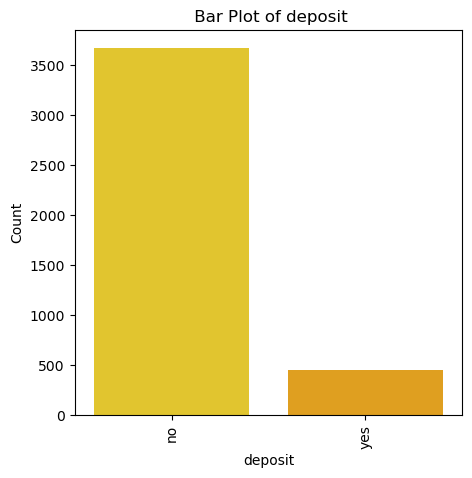

In [16]:
for feature in cate_cols:
    plt.figure(figsize=(5,5))
    sn.countplot(x=feature, data=bk1, palette='Wistia')
    plt.title(f' Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

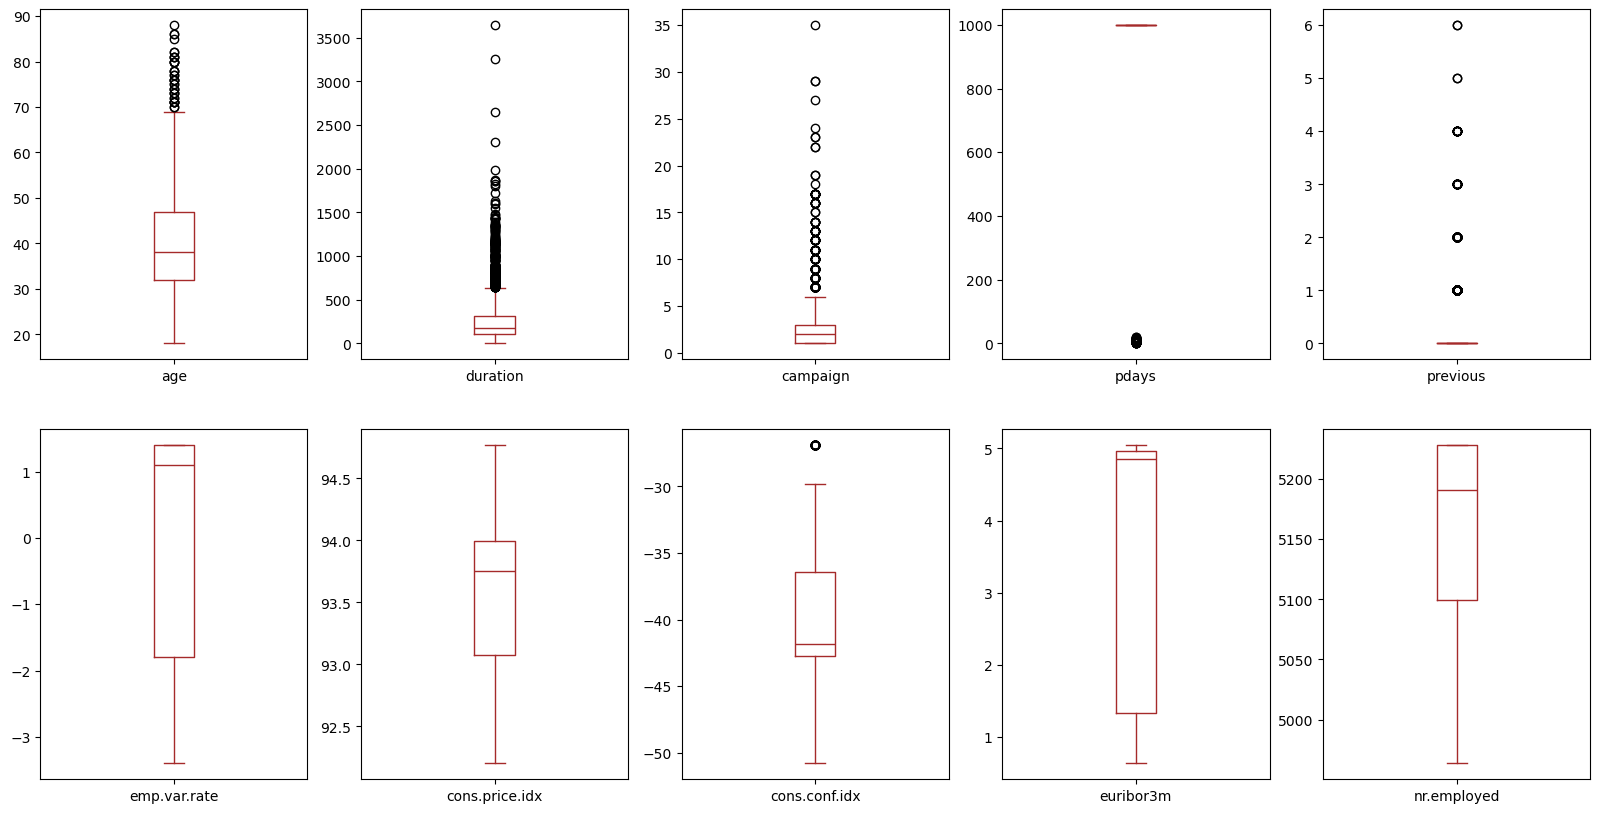

In [17]:
bk1.plot(kind='box', subplots = True, layout=(2,5), figsize=(20,10), color='#A52A2A')
plt.show()

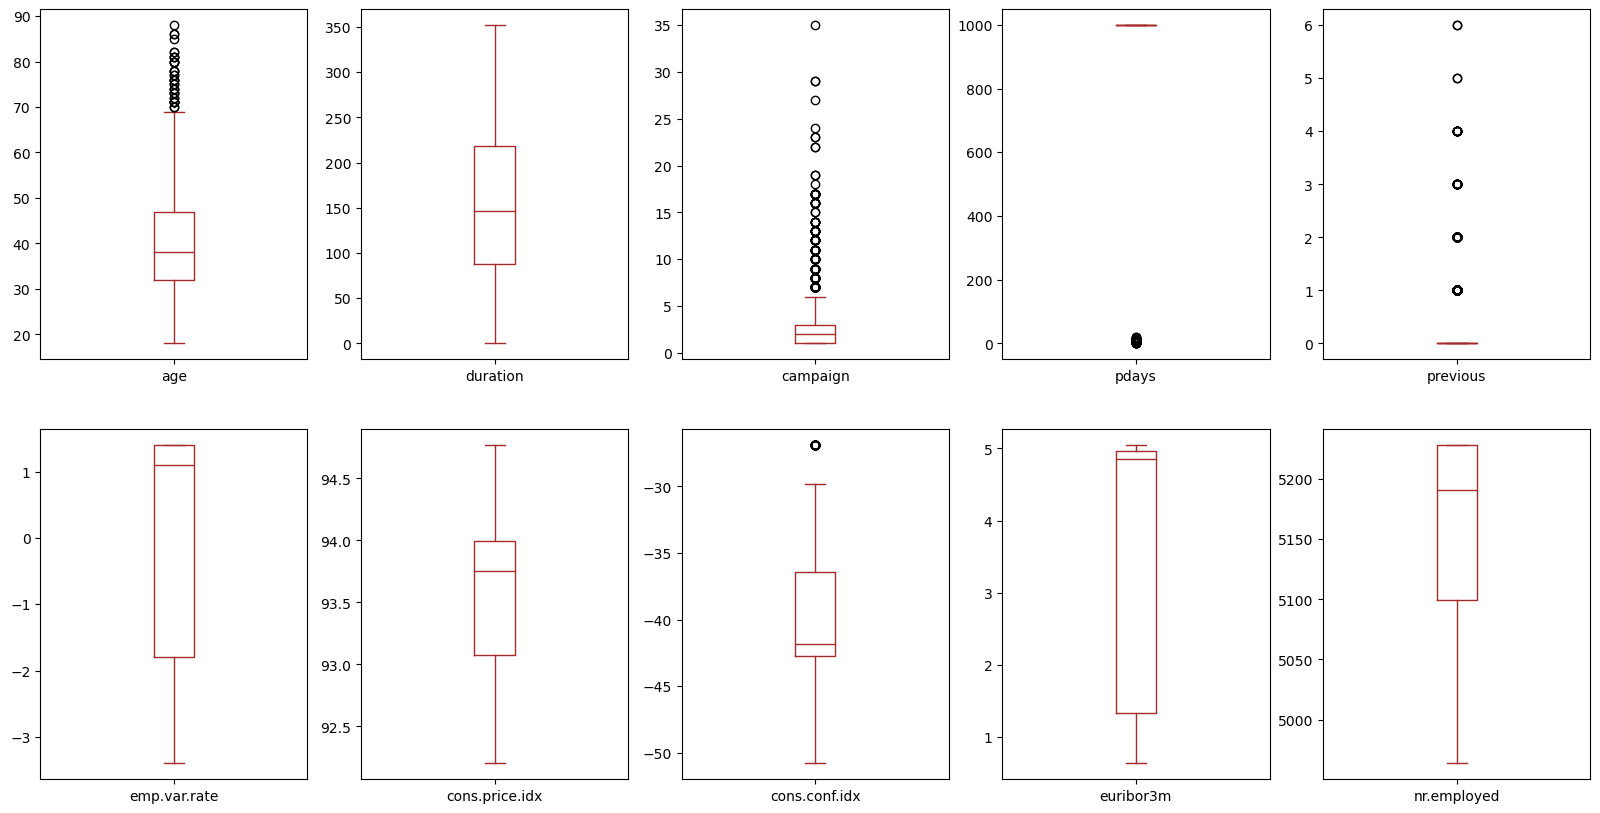

In [18]:
column = bk1[['age', 'campaign', 'duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column,75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 2.5 * iqr
bk1[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]
bk1.plot(kind='box', subplots = True, layout = (2,5), figsize = (20,10), color = '#A52A2A')
plt.show()

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.021888 -0.014169 -0.043425  0.050931   
duration        0.021888  1.000000 -0.205073 -0.092862  0.080397   
campaign       -0.014169 -0.205073  1.000000  0.058742 -0.091490   
pdays          -0.043425 -0.092862  0.058742  1.000000 -0.587941   
previous        0.050931  0.080397 -0.091490 -0.587941  1.000000   
emp.var.rate   -0.019192 -0.080344  0.176079  0.270684 -0.415238   
cons.price.idx -0.000482 -0.003291  0.145021  0.058472 -0.164922   
cons.conf.idx   0.098135  0.027533  0.007882 -0.092090 -0.051420   
euribor3m      -0.015033 -0.090769  0.159435  0.301478 -0.458851   
nr.employed    -0.041936 -0.124495  0.161037  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.019192       -0.000482       0.098135  -0.015033   
duration           -0.080344       -0.003291       0.027533  -0.090769   
campaign            0.176079 

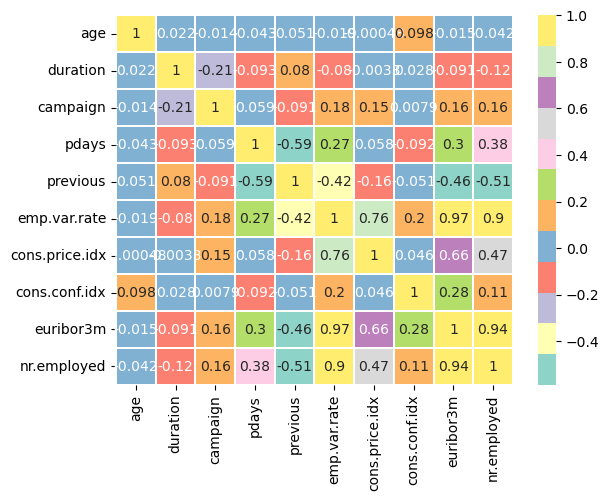

In [19]:
corr = bk1.select_dtypes(include=[np.number]).corr()
print(corr)
sn.heatmap(corr, annot=True, cmap='Set3', linewidths=0.2)
plt.show()

In [20]:
bk11 = bk1.copy()
bk11.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [21]:
numeric_df = bk11.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
bk11.drop(high_corr_cols, inplace=True, axis=1)
print(bk11.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'deposit'],
      dtype='object')


In [22]:
columns_to_drop = [col for col in high_corr_cols if col in bk11.columns]
bk11.drop(columns_to_drop, inplace=True, axis=1)
print(bk11.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'deposit'],
      dtype='object')


In [23]:
bk11.shape

(4119, 19)

In [24]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
bk1_encoded = bk11.apply(lb.fit_transform)
bk1_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,350,1,20,0,1,3,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,8,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,9,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,9,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,7,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,9,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,9,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,3,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,350,0,20,0,1,9,13,17,0


In [25]:
bk1_encoded['deposit'].value_counts()

deposit
0    3668
1     451
Name: count, dtype: int64

In [26]:
x = bk1_encoded.drop('deposit', axis=1)
y = bk1_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 18)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [27]:
from sklearn.model_selection import train_test_split
print(4119*0.25)

1029.75


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3089, 18)
(3089,)
(1030, 18)
(1030,)


In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def eva_mode(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy Score:', acc)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    print('Classification Report:\n', classification_report(y_test, y_pred))

def mscore(model):
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print('Training Score:', train_score)
    print('testing Score:', test_score)

In [35]:
from sklearn.tree import DecisionTreeClassifier

bk1 = DecisionTreeClassifier(criterion = 'gini', max_depth=5, min_samples_split=10)
bk1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [36]:
mscore(bk1)

Training Score: 0.9155066364519262
testing Score: 0.912621359223301


In [37]:
ypred_bk1 = bk1.predict(x_test)
print(ypred_bk1)

[0 0 1 ... 1 0 0]


In [38]:
eva_mode(y_test, ypred_bk1)

Accuracy Score: 0.912621359223301
Confusion Matrix:
 [[913  17]
 [ 73  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.61      0.27      0.38       100

    accuracy                           0.91      1030
   macro avg       0.77      0.63      0.66      1030
weighted avg       0.90      0.91      0.90      1030



In [39]:
from sklearn.tree import plot_tree
cn = ['no', 'yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx'],
      dtype='object')
['no', 'yes']


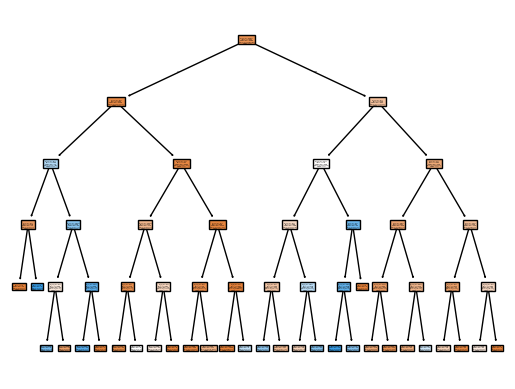

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(bk1, class_names = cn, filled = True)
plt.show()

In [41]:
bk11 = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, min_samples_split=15)
bk11.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [42]:
mscore(bk11)

Training Score: 0.9038523794108125
testing Score: 0.9155339805825242


In [44]:
ypred_bk11 = bk11.predict(x_test)
eva_mode(y_test, ypred_bk11)

Accuracy Score: 0.9155339805825242
Confusion Matrix:
 [[900  30]
 [ 57  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       930
           1       0.59      0.43      0.50       100

    accuracy                           0.92      1030
   macro avg       0.76      0.70      0.73      1030
weighted avg       0.91      0.92      0.91      1030



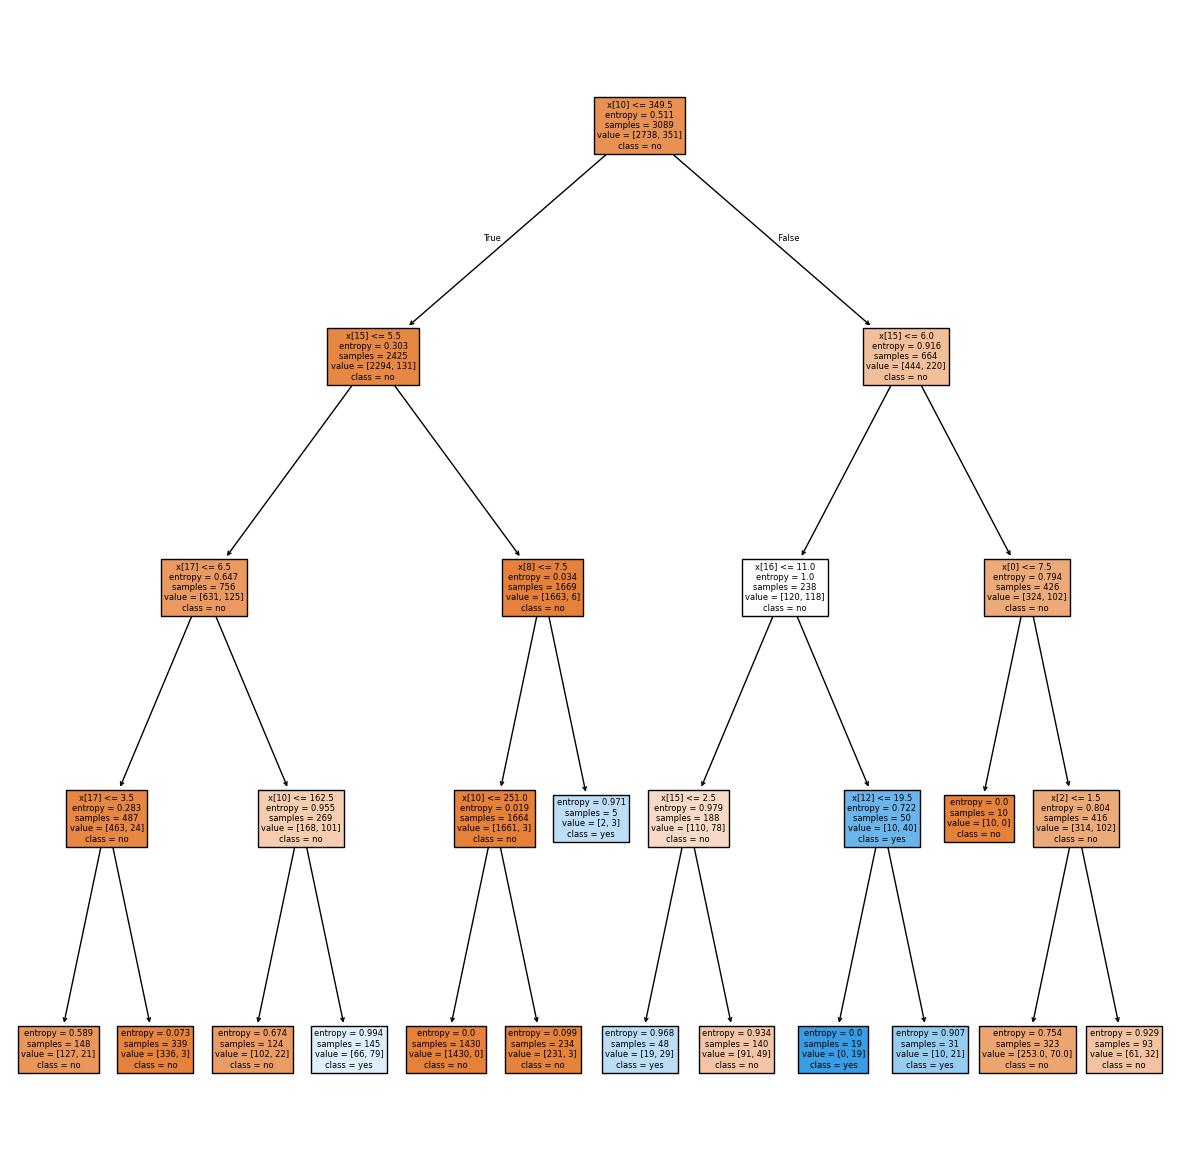

In [46]:
plt.figure(figsize=(15,15))
plot_tree(bk11, class_names=cn, filled=True)
plt.show()

In [48]:
bk2 = pd.read_csv("C:/Users/ABHILIPSA/Downloads/bank+marketing (1)/bank/bank.csv",delimiter=';')
bk2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [49]:
bk2.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [50]:
bk2.shape

(4521, 17)

In [51]:
bk2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [52]:
bk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [53]:
bk2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [54]:
bk2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

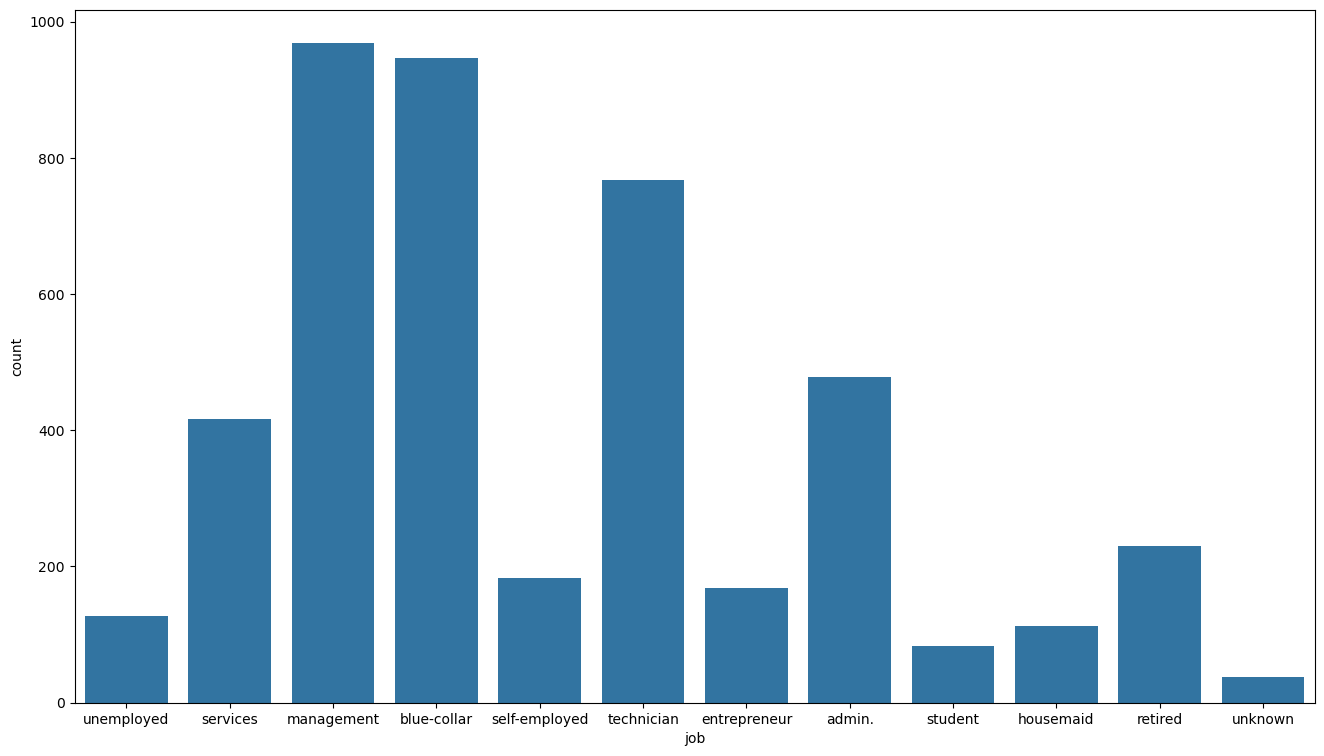

In [55]:
plt.figure(figsize=(16,9))
sn.countplot(x="job", data=bk2)
plt.show()

In [56]:
df = pd.read_csv("C:/Users/ABHILIPSA/Downloads/bank+marketing (1)/bank-additional/bank-additional/bank-additional.csv", delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [57]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [58]:
df.shape

(4119, 21)

In [59]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [61]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [62]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: xlabel='job', ylabel='count'>

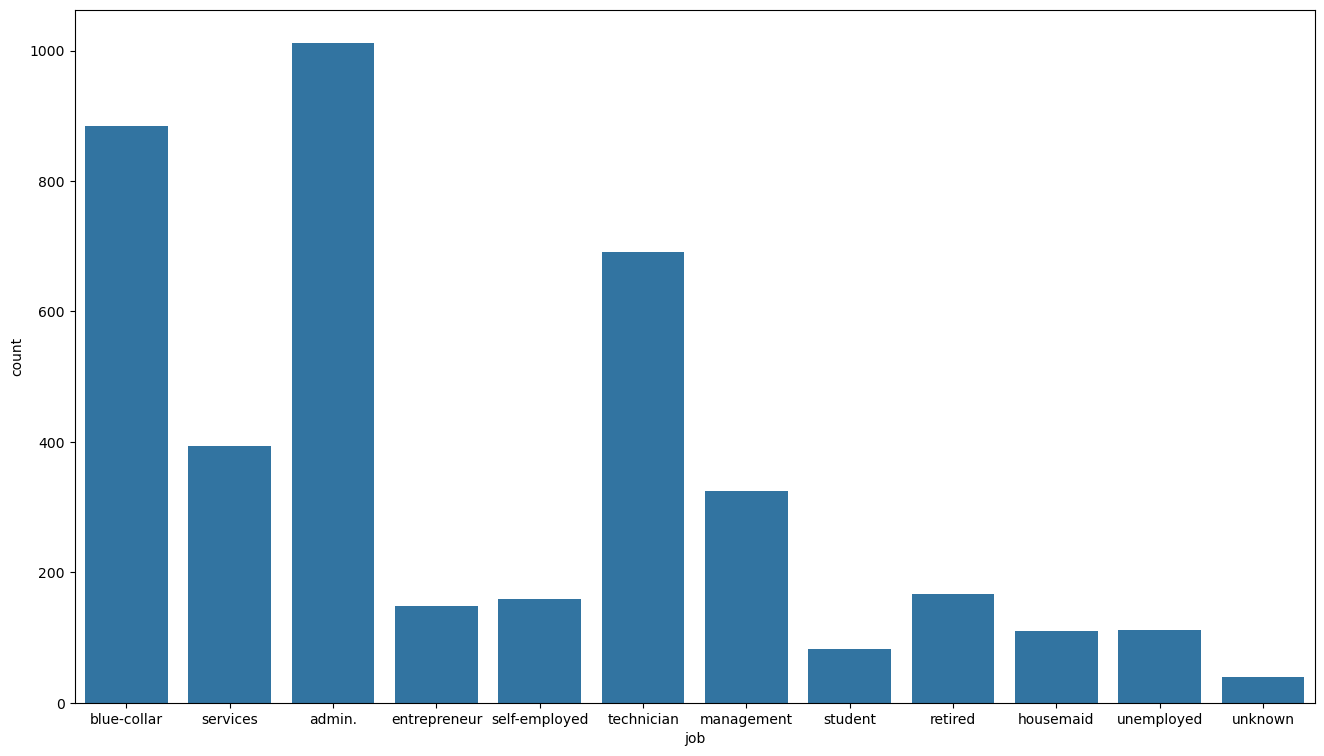

In [63]:
plt.figure(figsize=(16,9))
sn.countplot(x="job", data=df)

<Axes: xlabel='marital', ylabel='count'>

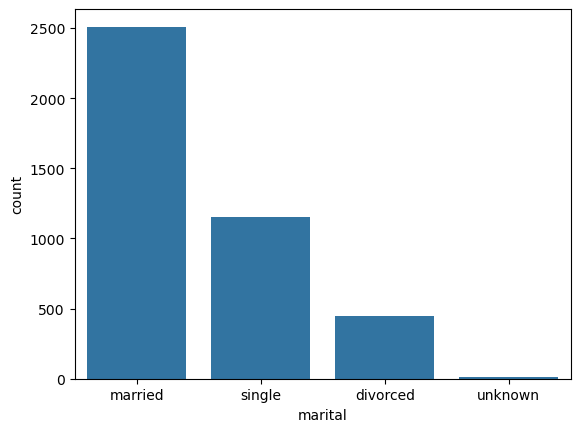

In [64]:
sn.countplot(x="marital", data=df)

<Axes: xlabel='education', ylabel='count'>

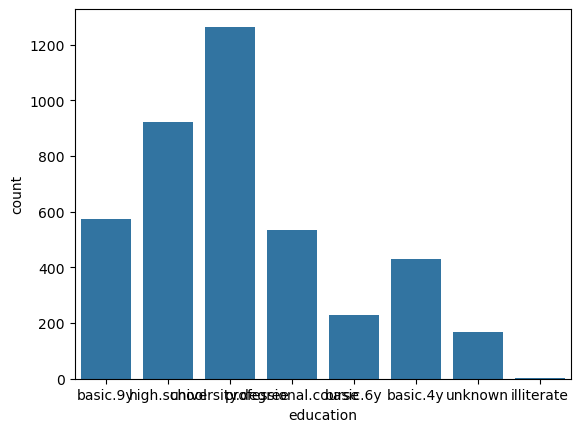

In [65]:
sn.countplot(x="education", data=df)

<Axes: xlabel='loan', ylabel='count'>

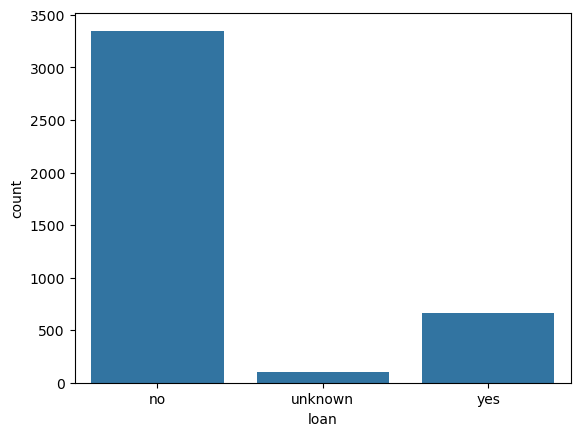

In [66]:
sn.countplot(x="loan", data=df)

<Axes: xlabel='default', ylabel='count'>

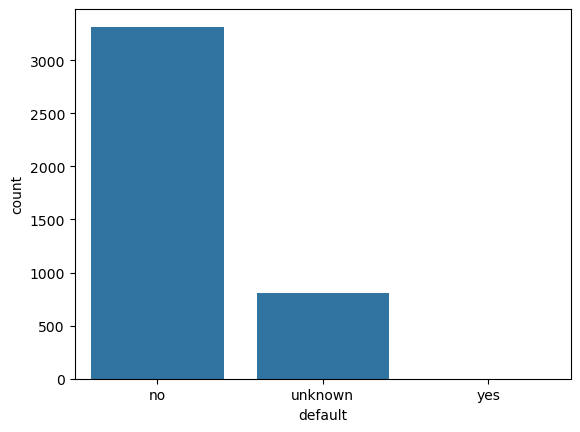

In [67]:
sn.countplot(x="default", data=df)

<Figure size 1600x900 with 0 Axes>

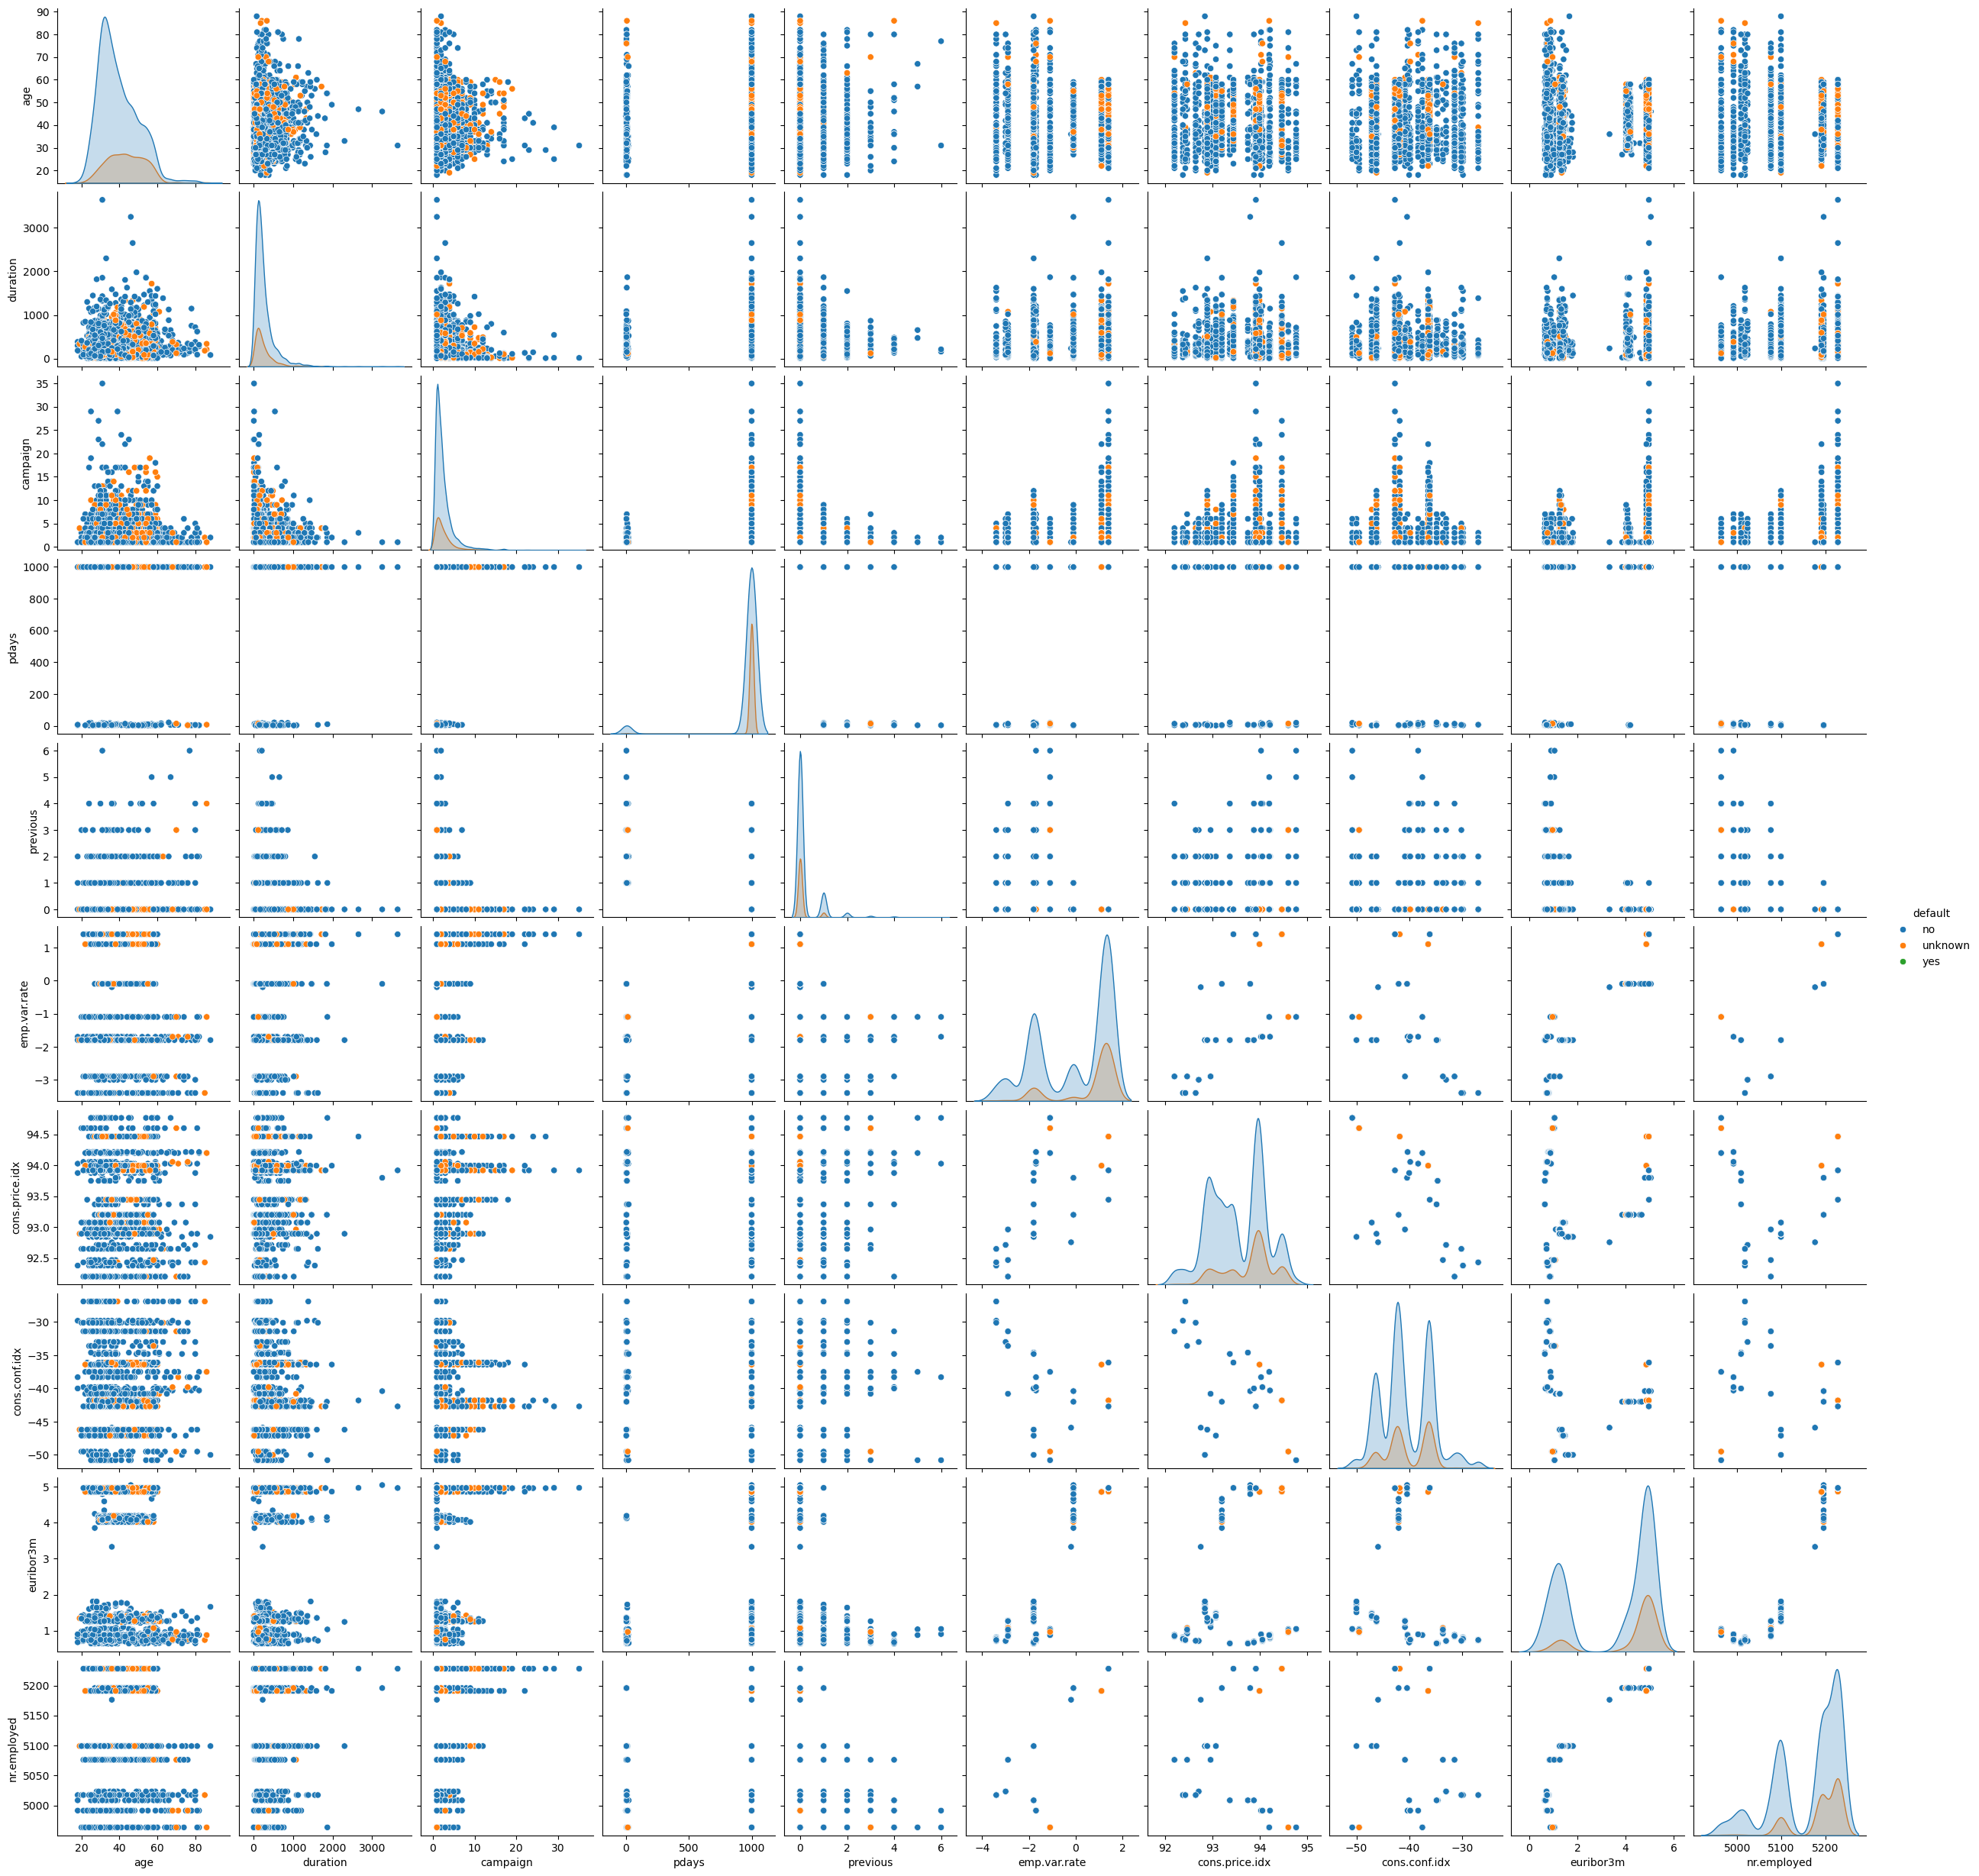

In [68]:
plt.figure(figsize=(16,9))
sn.pairplot(data=df, hue="default")

In [69]:
my_df = df.select_dtypes(exclude=[object])
my_df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


<Axes: >

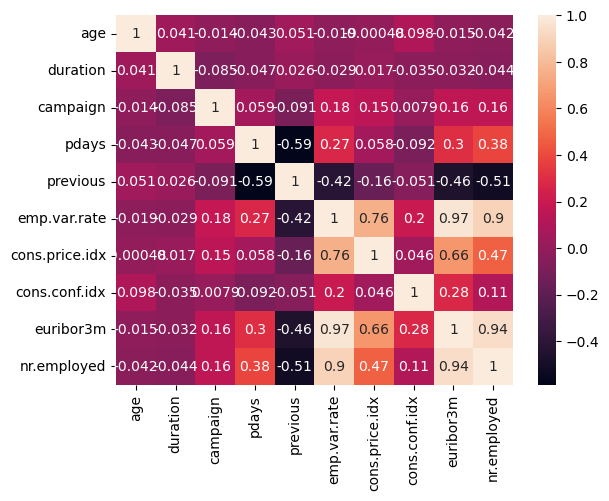

In [71]:
plt.figure(figure=(16,9))
sn.heatmap(my_df.corr(),annot=True)

In [73]:
df["job"] = lb.fit_transform(df["job"])
df["marital"] = lb.fit_transform(df["marital"])
df["education"] = lb.fit_transform(df["education"])
df["loan"] = lb.fit_transform(df["loan"])
df["contact"] = lb.fit_transform(df["contact"])
df["poutcome"] = lb.fit_transform(df["poutcome"])
df["housing"] = lb.fit_transform(df["housing"])
df["month"] = lb.fit_transform(df["month"])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,no,2,0,0,6,fri,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,7,2,3,no,0,0,1,6,fri,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,no
2,25,7,1,3,no,2,0,1,4,wed,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,no
3,38,7,1,2,no,1,1,1,4,fri,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,no
4,47,0,1,6,no,2,0,0,7,mon,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,no


In [74]:
df.drop(["pdays","previous","poutcome"],axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,no,2,0,0,6,fri,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,7,2,3,no,0,0,1,6,fri,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,no
2,25,7,1,3,no,2,0,1,4,wed,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,no
3,38,7,1,2,no,1,1,1,4,fri,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,no
4,47,0,1,6,no,2,0,0,7,mon,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,no


In [75]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,0,1,1,no,2,2,0,3,thu,...,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,0,1,3,no,2,0,1,3,fri,...,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,8,2,3,no,0,0,0,6,mon,...,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,0,1,3,no,0,0,0,1,fri,...,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,4,2,3,no,2,0,0,7,wed,...,1,999,0,1,-0.1,93.200,-42.0,4.120,5195.8,no
